In [1]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
# data normalization

mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train-mean)/std
X_test  = (X_test-mean)/std

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)
    
# weights
W = tf.Variable(tf.random.normal((784, 10), 
                                 mean=0, 
                                 stddev=0.01, 
                                 dtype=tf.float64))
b = tf.Variable(tf.zeros((10,), dtype=tf.float64))

# loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# training
lr = 0.01
num_epochs = 50
losses = [] # for debug

for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X_train, W, b)
        
        # loss
        loss = loss_fn(y_train, output)
        losses.append(loss.numpy())
        
    # gradient
    dW, db = t.gradient(loss, [W, b])

    # update
    W.assign_sub(lr*dW) 
    b.assign_sub(lr*db)

Text(0, 0.5, 'Loss')

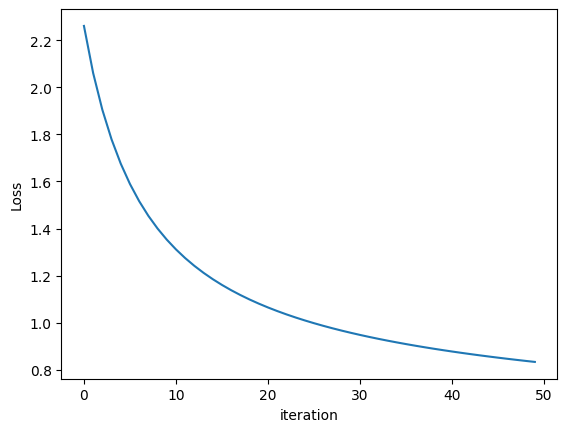

In [4]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')

In [5]:
preds = predict(X_test, W, b)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

acc = np.mean(predicted_class == y_test)
print(acc.mean())

0.7392
